<a href="https://colab.research.google.com/github/nuribrahim1/Time-Series/blob/main/TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
from statsmodels.tsa.statespace.sarimax import SARIMAX
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install -U git+https://github.com/scikit-multiflow/scikit-multiflow

  Cloning https://github.com/scikit-multiflow/scikit-multiflow to /tmp/pip-req-build-s3_gjzau
  Running command git clone --filter=blob:none --quiet https://github.com/scikit-multiflow/scikit-multiflow /tmp/pip-req-build-s3_gjzau
  Resolved https://github.com/scikit-multiflow/scikit-multiflow to commit d073a706b5006cba2584761286b7fa17e74e87be
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-multiflow: filename=scikit_multiflow-0.6.dev0-cp310-cp310-linux_x86_64.whl size=1329054 sha256=6fa51adca1c149fc3ae67bbd13af5ce3bb4b370d8cdd38524a5894988141fa8f
  Stored in directory: /tmp/pip-ephem-wheel-cache-bezhi9pr/wheels/6c/3b/bb/448d28745a0e3209c9347e3af9fdebfc8ff493e3bf0cebd6e0
Successfully built scikit-multiflow


# Preprocessing

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab/AEP_hourly.csv')
data['Datetime'] = pd.to_datetime(data['Datetime'])

data['Date'] = data['Datetime'].dt.date
data['Month'] = data['Datetime'].dt.month
data['Weekday'] = data['Datetime'].dt.weekday
data['Hour'] = data['Datetime'].dt.hour

print(data.head())

             Datetime   AEP_MW        Date  Month  Weekday  Hour
0 2004-12-31 01:00:00  13478.0  2004-12-31     12        4     1
1 2004-12-31 02:00:00  12865.0  2004-12-31     12        4     2
2 2004-12-31 03:00:00  12577.0  2004-12-31     12        4     3
3 2004-12-31 04:00:00  12517.0  2004-12-31     12        4     4
4 2004-12-31 05:00:00  12670.0  2004-12-31     12        4     5


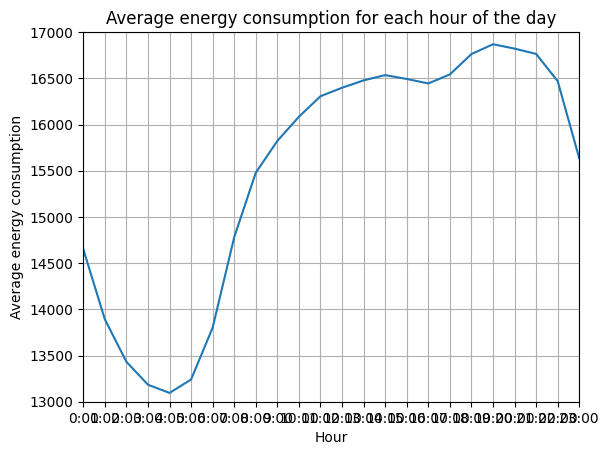

In [4]:
hourly = data.groupby('Hour')['AEP_MW'].mean()
plt.plot(hourly.index,hourly.values)
plt.xlabel('Hour')
plt.ylabel('Average energy consumption')
plt.title('Average energy consumption for each hour of the day')
plt.xticks(ticks=range(24), labels= [f'{i}:00' for i in range(24)])
plt.ylim(bottom=13000,top=17000)
plt.xlim(left=0, right=23)
plt.grid(True)
plt.show()

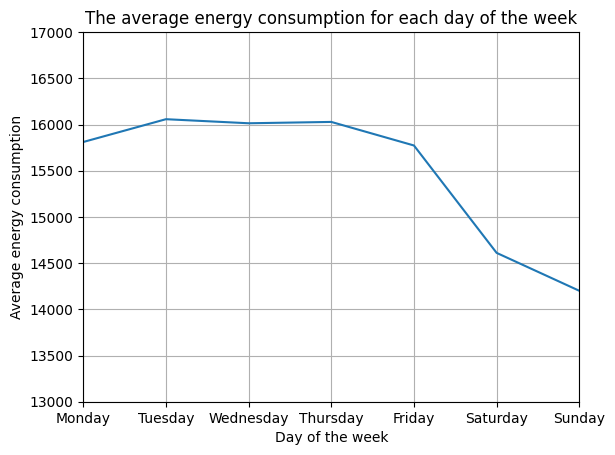

In [5]:
weekly = (data.groupby('Weekday')['AEP_MW'].mean())
weekly.plot()
plt.xlabel('Day of the week')
plt.ylabel('Average energy consumption')
plt.title('The average energy consumption for each day of the week')
plt.xticks(ticks=range(7), labels=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.ylim(bottom=13000,top=17000)
plt.xlim(left=0, right=6)
plt.grid(True)
plt.show()

Month
1     17431.269009
2     17022.815084
3     15376.835720
4     13823.857511
5     14006.393817
6     15630.021825
7     16349.853303
8     16424.881699
9     14657.280556
10    13938.926431
11    14930.405676
12    16445.609084
Name: AEP_MW, dtype: float64


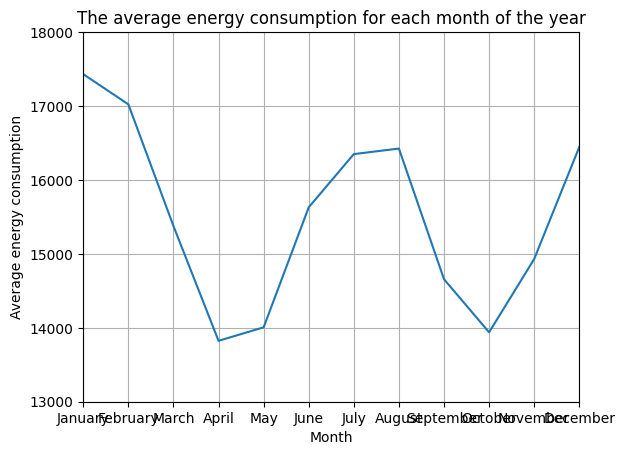

In [6]:
monthly = data.groupby('Month')['AEP_MW'].mean()
print(monthly)
monthly.plot()
plt.xlabel('Month')
plt.ylabel('Average energy consumption')
plt.title('The average energy consumption for each month of the year')
plt.xticks(ticks=range(1,13), labels=['January','February','March','April','May','June','July','August','September'
    ,'October','November','December'])
plt.ylim(bottom=13000,top=18000)
plt.xlim(left=1, right=12)
plt.grid(True)
plt.show()

Datetime
2004-10-01    14284.521739
2004-10-02    12999.875000
2004-10-03    12227.083333
2004-10-04    14309.041667
2004-10-05    14439.708333
                  ...     
2018-07-30    15368.083333
2018-07-31    15180.291667
2018-08-01    15151.166667
2018-08-02    15687.666667
2018-08-03    14809.000000
Freq: D, Name: AEP_MW, Length: 5055, dtype: float64


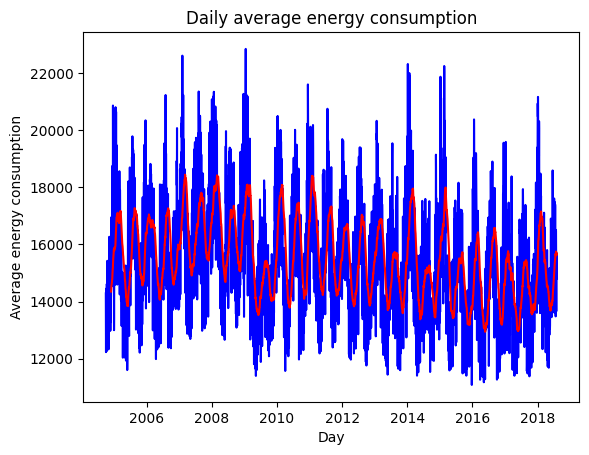

In [7]:
data = data.set_index('Datetime')
daily = data['AEP_MW'].resample('D').mean()
print(daily)
rolling_average = daily.rolling(window=60).mean()
plt.plot(daily.index, daily.values, color = 'blue')
plt.plot(rolling_average.index, rolling_average.values, color='red')
plt.xlabel('Day')
plt.ylabel('Average energy consumption')
plt.title('Daily average energy consumption')
plt.show()

In [8]:
x = daily
result = adfuller(x)
print(f'ADF statistics: {result[0]}')
print(f'p-value: {result[1]}')
print('Critical Values')
for key, value in result[4].items():
    print(f'{key}:{value}')

ADF statistics: -7.4875156703390635
p-value: 4.597183239476787e-11
Critical Values
1%:-3.4316522779278373
5%:-2.8621154666284063
10%:-2.5670763214801435


In [9]:
from statsmodels.tsa.stattools import kpss

kpss_result = kpss(daily)
print(f'KPSS statistics: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')
print('Critical Values')
for key, value in kpss_result[3].items():
    print(f'{key}:{value}')

KPSS statistics: 1.720969753081275
p-value: 0.01
Critical Values
10%:0.347
5%:0.463
2.5%:0.574
1%:0.739


<ipython-input-9-283fa3a06f58>:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_result = kpss(daily)


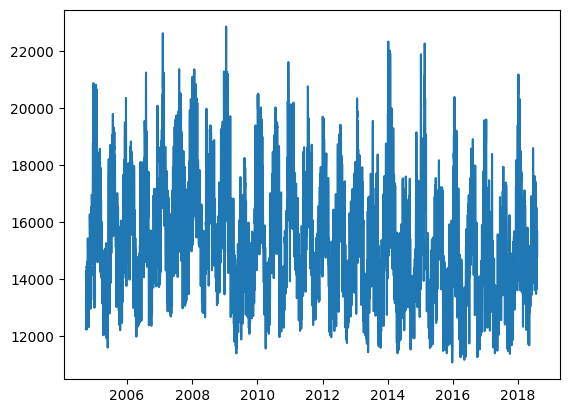

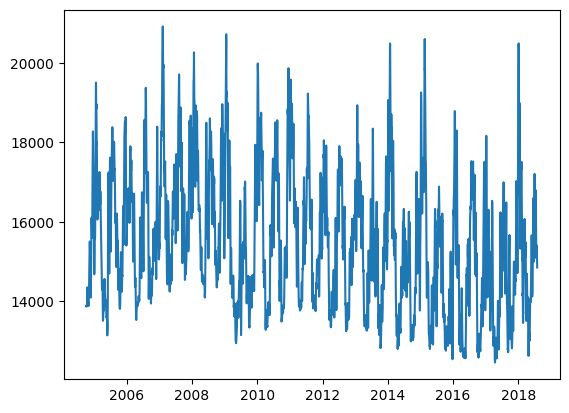

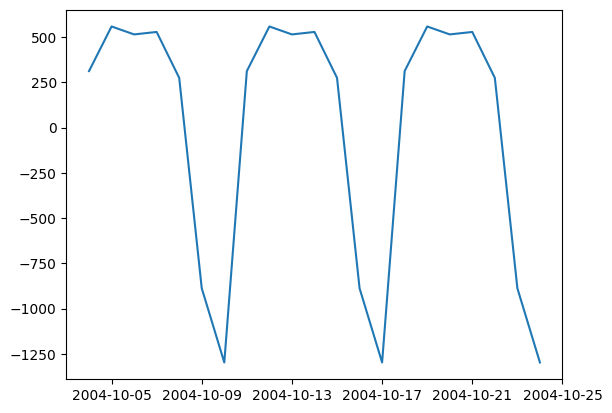

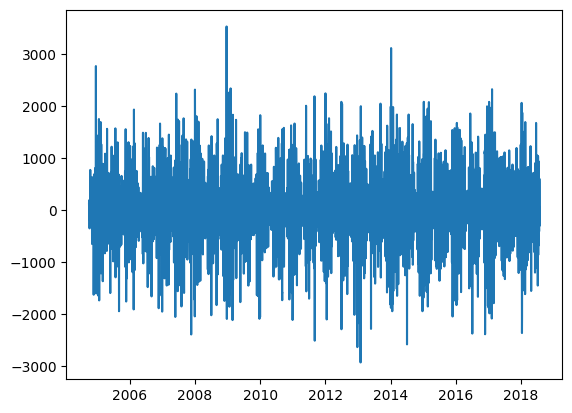

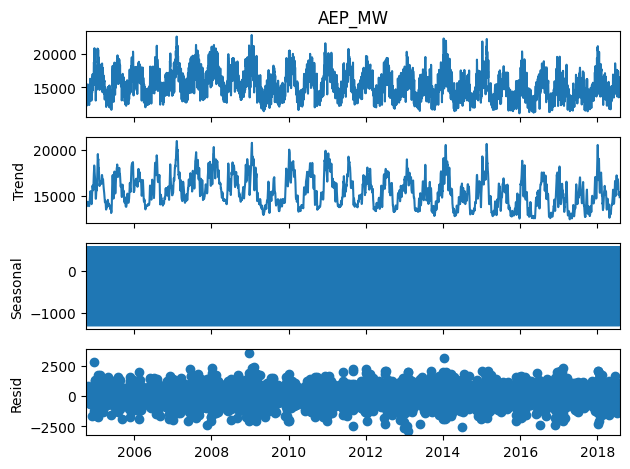

In [10]:
decomposition = seasonal_decompose(x, model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid
plt.plot(x, label='Original')
plt.show()
plt.plot(trend, label='Trend')
plt.show()
plt.plot(seasonal[3:24], label='Seasonal')
plt.show()
plt.plot(residual, label='Residual')
plt.show()
decomposition.plot()
plt.show()

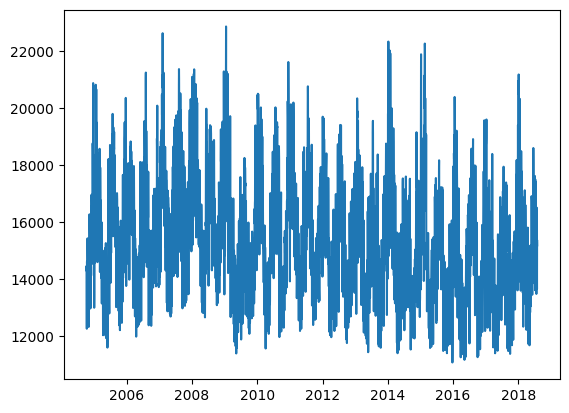

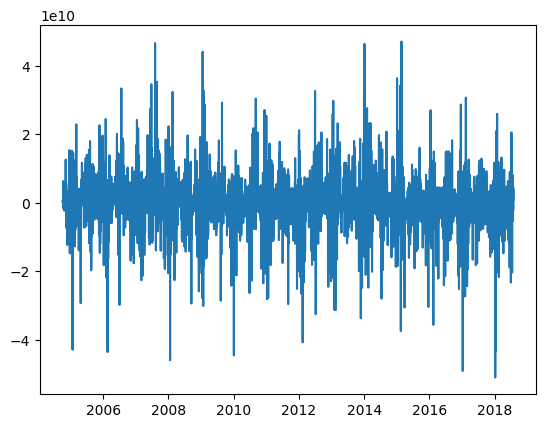

In [11]:
red_noise = seasonal+trend+residual
plt.plot(red_noise)
plt.show()

mult = seasonal*trend*residual
plt.plot(mult)
plt.show()

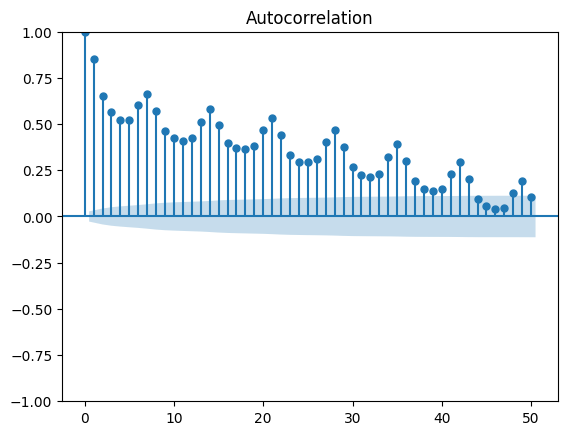

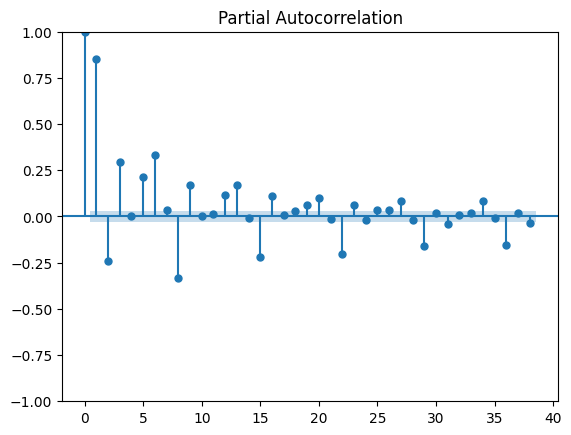

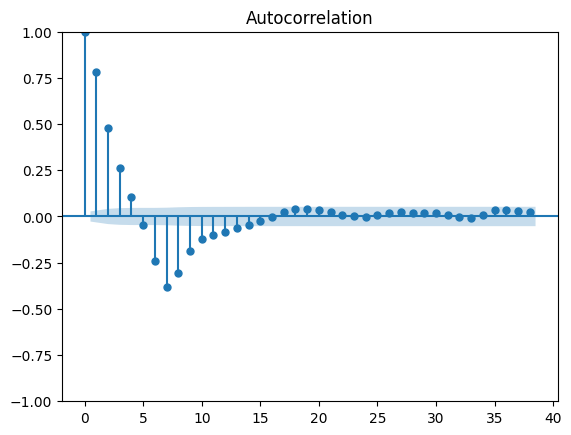

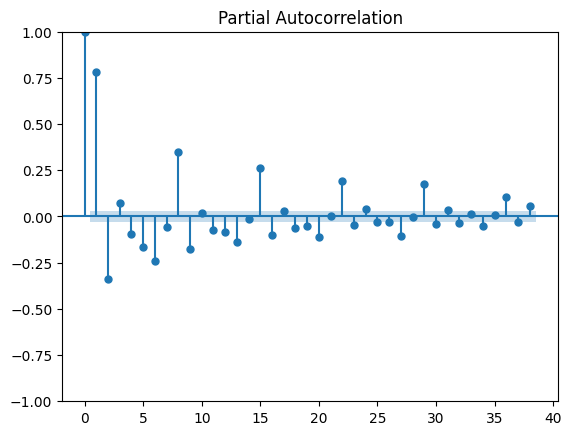

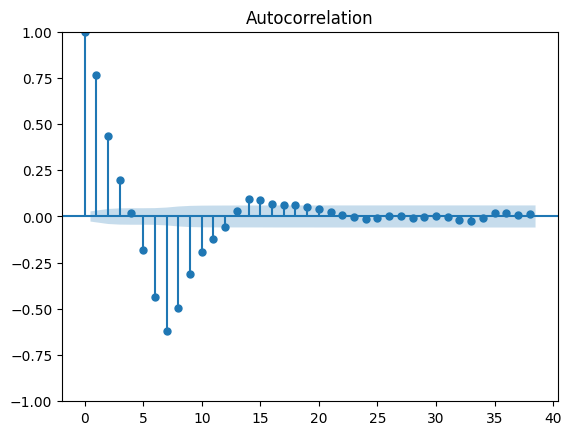

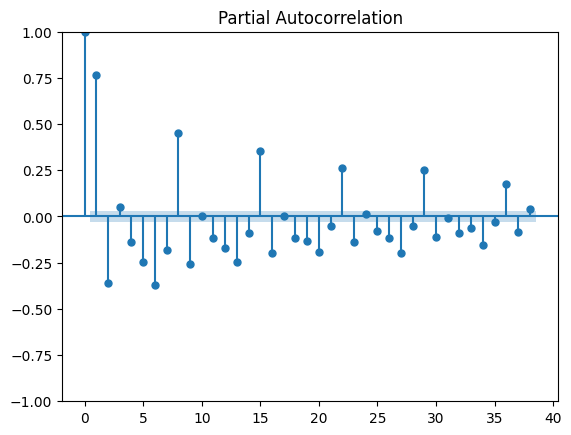

In [12]:
diff_data = x.diff(7).dropna()
plot_acf(x, lags=50)
plt.show()

plot_pacf(x, ax=plt.gca())
plt.show()

plot_acf(diff_data, ax=plt.gca())
plt.show()

plot_pacf(diff_data, ax=plt.gca())
plt.show()

diff2 = diff_data.diff(7).dropna()
plot_acf(diff2, ax=plt.gca())
plt.show()

plot_pacf(diff2, ax=plt.gca())
plt.show()

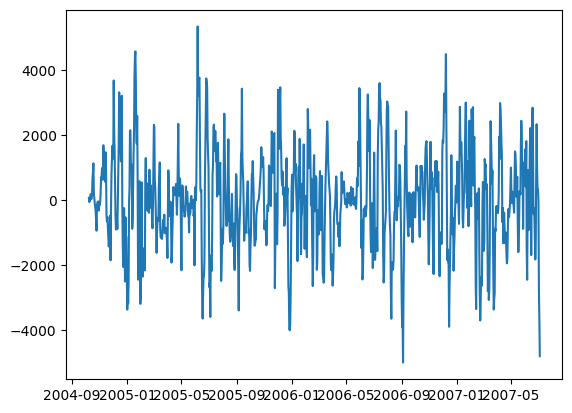

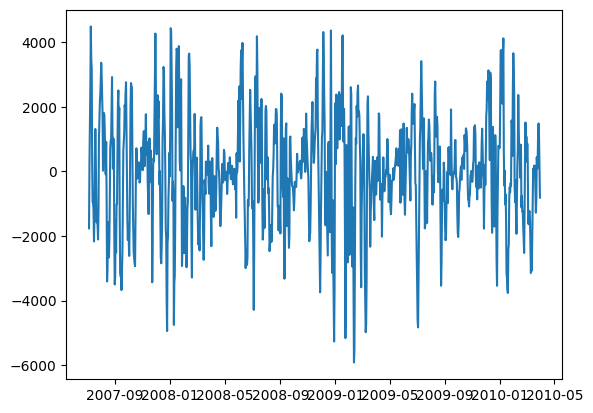

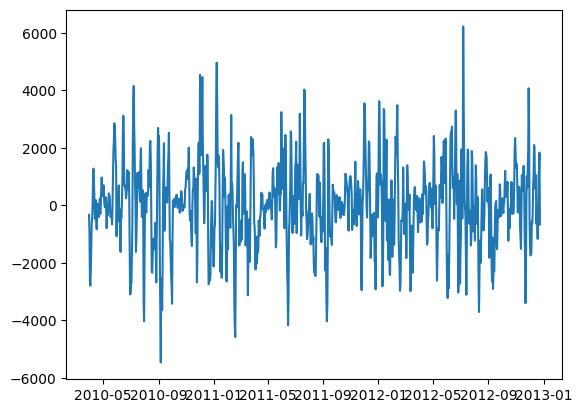

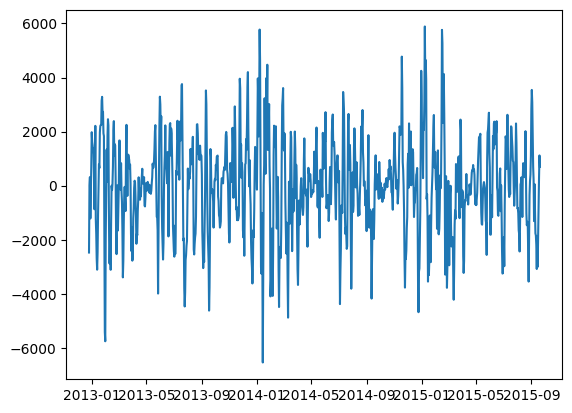

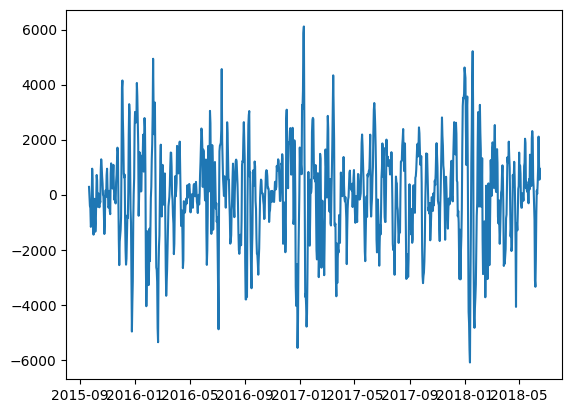

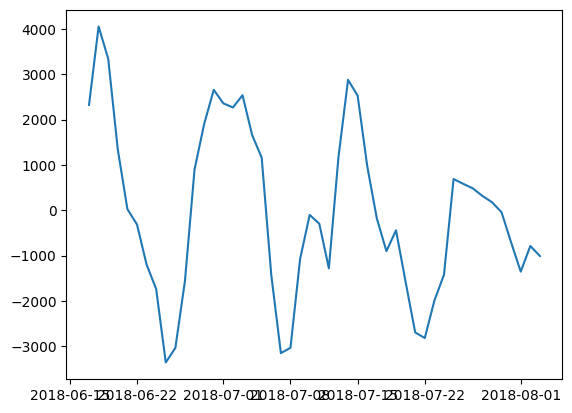

In [13]:
plt.plot(diff_data[:1000])
plt.show()
plt.plot(diff_data[1000:2000])
plt.show()
plt.plot(diff_data[2000:3000])
plt.show()
plt.plot(diff_data[3000:4000])
plt.show()
plt.plot(diff_data[4000:5000])
plt.show()
plt.plot(diff_data[5000:6000])
plt.show()

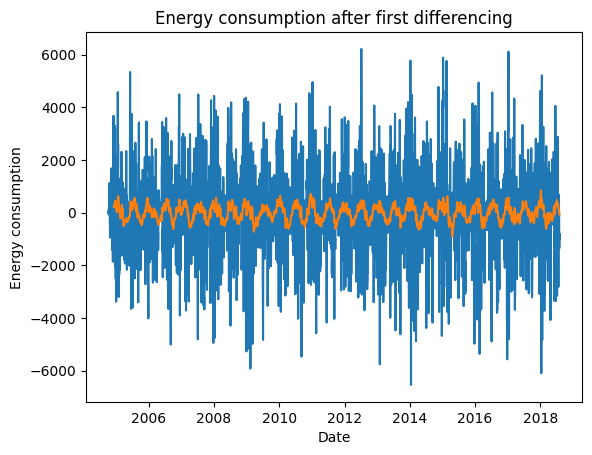

KPSS statistics: 0.0067839063662654235
p-value: 0.1
Critical Values
10%:0.347
5%:0.463
2.5%:0.574
1%:0.739


<ipython-input-14-2aea1834f2af>:9: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(diff_data)


In [14]:
plt.plot(diff_data)
rolling_diff=diff_data.rolling(window=60).mean()
plt.plot(rolling_diff)
plt.xlabel('Date')
plt.ylabel('Energy consumption')
plt.title('Energy consumption after first differencing')
plt.show()

kpss_result = kpss(diff_data)
print(f'KPSS statistics: {kpss_result[0]}')
print(f'p-value: {kpss_result[1]}')
print('Critical Values')
for key, value in kpss_result[3].items():
    print(f'{key}:{value}')

Datetime
2004-10-31    13947.537736
2004-11-30    14830.440278
2004-12-31    16737.720430
2005-01-31    17117.088710
2005-02-28    16496.644345
                  ...     
2018-04-30    13639.244444
2018-05-31    14117.005376
2018-06-30    15305.250000
2018-07-31    15926.622312
2018-08-31    15406.959184
Freq: M, Name: AEP_MW, Length: 167, dtype: float64


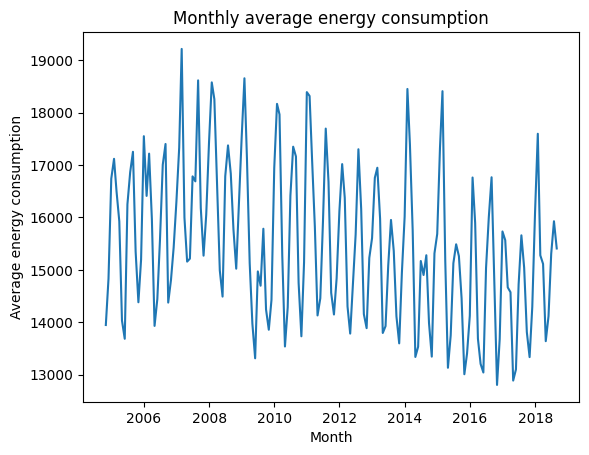

In [15]:
#data.set_index('Datetime', inplace=True)
month = data['AEP_MW'].resample('M').mean()
month = month.asfreq(freq='M')
print(month)
plt.plot(month.index,month.values)
plt.xlabel('Month')
plt.ylabel('Average energy consumption')
plt.title('Monthly average energy consumption')
plt.show()

# ADWIN

In [17]:
from skmultiflow.drift_detection import ADWIN

In [18]:
adwin = ADWIN()
count = 0
list=[]
for date, Number in enumerate(daily):
  adwin.add_element(Number)
  if adwin.detected_change():
    #print(f'Change detected at {date}')
    count+=1
    list.append(date)
print(count)
#print(daily.shape)

40


In [19]:
for date in list:
  print(daily.index[date])

2005-02-05 00:00:00
2005-03-09 00:00:00
2005-05-12 00:00:00
2005-06-13 00:00:00
2005-08-16 00:00:00
2005-11-20 00:00:00
2006-01-23 00:00:00
2006-03-28 00:00:00
2006-04-29 00:00:00
2006-05-31 00:00:00
2006-07-02 00:00:00
2006-08-03 00:00:00
2006-09-04 00:00:00
2006-11-07 00:00:00
2007-04-16 00:00:00
2007-08-22 00:00:00
2008-03-01 00:00:00
2008-05-04 00:00:00
2008-08-08 00:00:00
2008-09-09 00:00:00
2008-12-14 00:00:00
2009-01-15 00:00:00
2009-07-26 00:00:00
2010-05-10 00:00:00
2010-08-14 00:00:00
2010-09-15 00:00:00
2011-01-21 00:00:00
2011-04-27 00:00:00
2011-12-07 00:00:00
2012-05-15 00:00:00
2012-08-19 00:00:00
2013-08-06 00:00:00
2013-09-07 00:00:00
2014-10-28 00:00:00
2015-09-13 00:00:00
2016-01-19 00:00:00
2016-03-23 00:00:00
2017-03-10 00:00:00
2017-09-18 00:00:00
2018-04-30 00:00:00


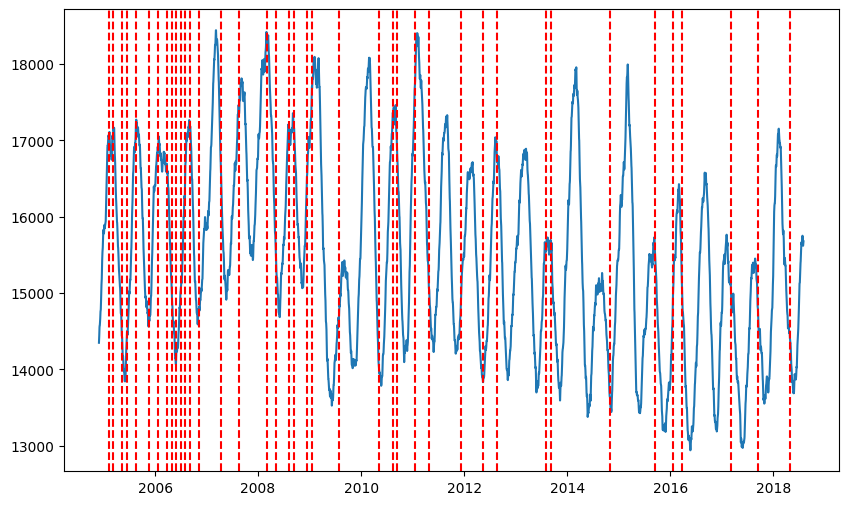

In [20]:
plt.figure(figsize=(10,6))
plt.plot(rolling_average)
for date in list:
  plt.axvline(x=daily.index[date], color='red',linestyle= '--')
plt.show()

In [21]:
for date in list:
  result = adfuller(x[date:])
  if result[1] > 0.05:
    print(daily.index[date])
    print(f'ADF statistics: {result[0]}')
    print(f'p-value: {result[1]}')
    print('Critical Values')
    for key, value in result[4].items():
        print(f'{key}:{value}')

2017-09-18 00:00:00
ADF statistics: -2.5127740177375215
p-value: 0.11239712404981644
Critical Values
1%:-3.451973573620699
5%:-2.8710633193086648
10%:-2.5718441306100512
2018-04-30 00:00:00
ADF statistics: -2.0348519783764
p-value: 0.2715038141244025
Critical Values
1%:-3.5117123057187376
5%:-2.8970475206326833
10%:-2.5857126912469153


In [22]:
POI = [datetime(2009,1,15),datetime(2009,7,26),datetime(2010,9,15),datetime(2012,8,19),datetime(2015,9,13)]

# EDDM

In [23]:
from skmultiflow.drift_detection import EDDM, DDM
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


In [24]:
def generate_sequences(data, seq_len=50):
  X = []
  Y = []
  for i in range(len(data) - seq_len):
    sequence = data.iloc[i+1:i+seq_len]
    if data.iloc[i]>sequence[0]:
      label = 1
    else:
      label = 0
    X.append(sequence)
    Y.append(label)
  return np.array(X), np.array(Y)

X,Y = generate_sequences(daily)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
RF_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
RF_classifier.fit(X_train, Y_train)

print (X_train.shape, X_test.shape)

<ipython-input-24-78e3e06d7b97>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if data.iloc[i]>sequence[0]:


(4004, 49) (1001, 49)


In [25]:
eddm = EDDM()
drifts = []

for i in range(len(X)):
  prediction = RF_classifier.predict(X[i].reshape(1, -1))
  error = 1 if prediction != Y[i] else 0
  eddm.add_element(error)
  if eddm.detected_change():
    drifts.append(i)

In [26]:
print(drifts)

[1074, 1755, 2311, 3112, 3688]


In [27]:
d_dates = []
for date in drifts:
  timestamp=(daily.index[date].date())
  d_dates.append(datetime(timestamp.year,timestamp.month,timestamp.day))
print(d_dates)

[datetime.datetime(2007, 9, 10, 0, 0), datetime.datetime(2009, 7, 22, 0, 0), datetime.datetime(2011, 1, 29, 0, 0), datetime.datetime(2013, 4, 9, 0, 0), datetime.datetime(2014, 11, 6, 0, 0)]


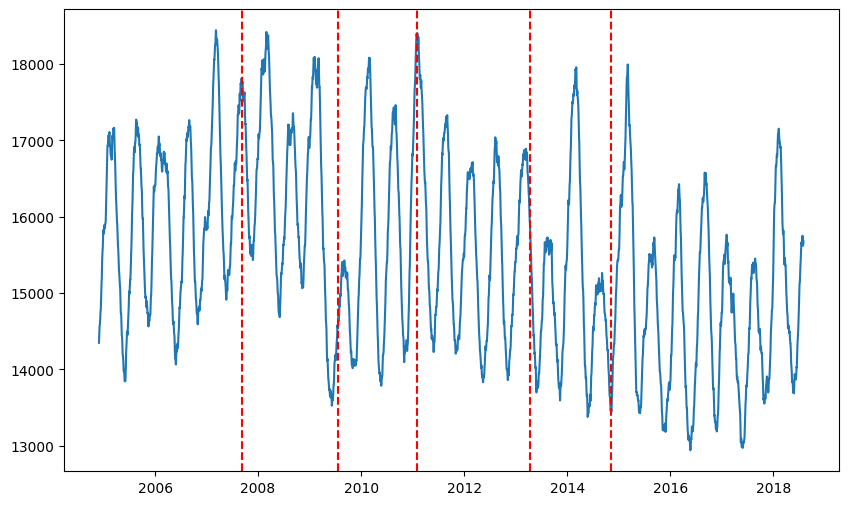

In [28]:
plt.figure(figsize=(10,6))
plt.plot(rolling_average)
for date in drifts:
  plt.axvline(x=daily.index[date], color='red',linestyle= '--')
plt.show()

# SARIMA

In [29]:
train_end = datetime(2018,1,1)
test_end = datetime(2018,8,3)
train_data = x[:train_end]
test_data = x[train_end + timedelta(days=1):test_end]

model = SARIMAX(train_data, order=(2,0,1),seasonal_order=(2,1,1,7))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                            AEP_MW   No. Observations:                 4841
Model:             SARIMAX(2, 0, 1)x(2, 1, 1, 7)   Log Likelihood              -38613.095
Date:                           Sat, 24 Aug 2024   AIC                          77240.190
Time:                                   22:57:20   BIC                          77285.574
Sample:                               10-01-2004   HQIC                         77256.124
                                    - 01-01-2018                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7066      0.037     19.209      0.000       0.635       0.779
ar.L2          0.1445      0.035      4.137

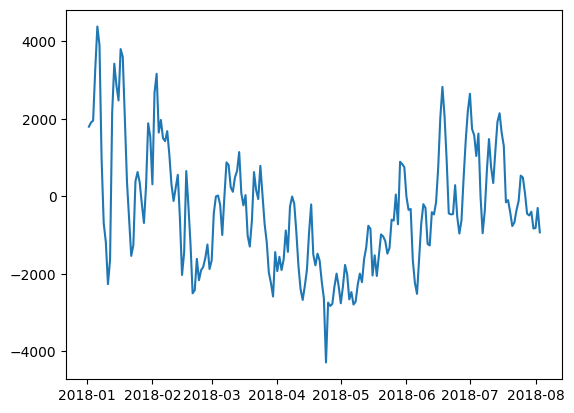

(214,) (214,)


In [30]:
prediction = model_fit.predict(start = train_end+timedelta(days=1), end=test_end)
residuals = test_data - prediction

plt.plot(residuals)
plt.show()
print(test_data.shape, prediction.shape)

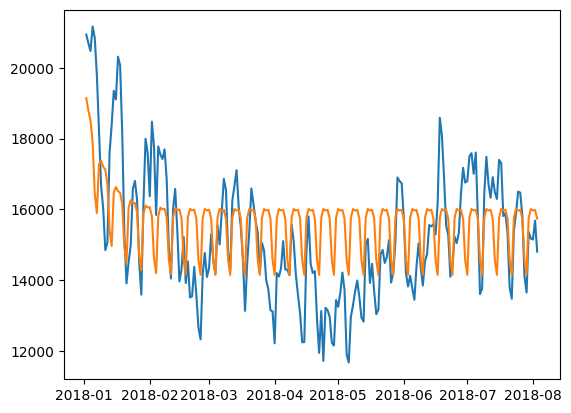

(214,) (4841,)


In [31]:
plt.plot(test_data)
plt.plot(prediction)
plt.show()
print(test_data.shape, train_data.shape)

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
print(f'MAE:{mean_absolute_error(test_data,prediction)}, RMSE: {np.sqrt(mean_squared_error(test_data,prediction))}')

MAE:1296.6022625921764, RMSE: 1598.686864759409


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


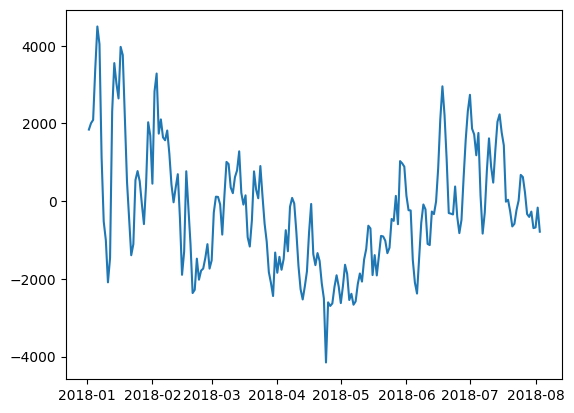

MAE:1296.6022625921764, RMSE: 1598.686864759409


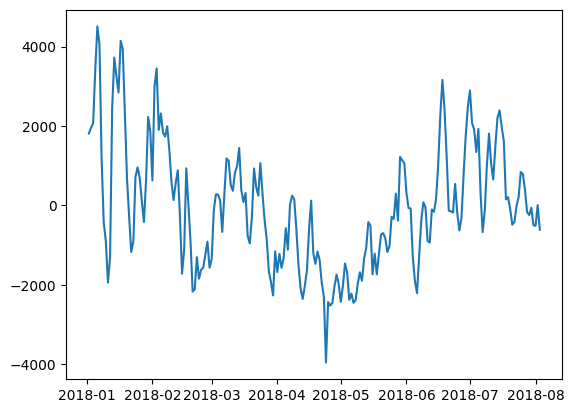

MAE:1296.6022625921764, RMSE: 1598.686864759409


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


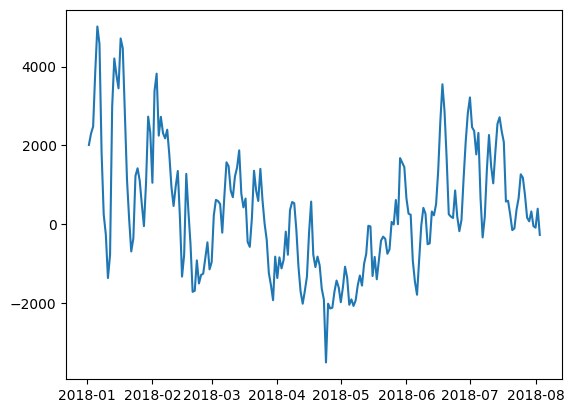

MAE:1296.6022625921764, RMSE: 1598.686864759409


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


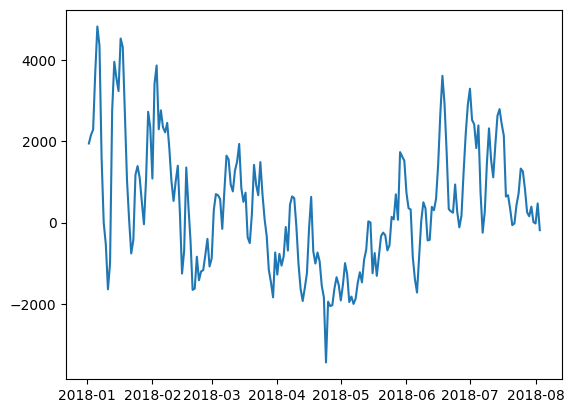

MAE:1296.6022625921764, RMSE: 1598.686864759409


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


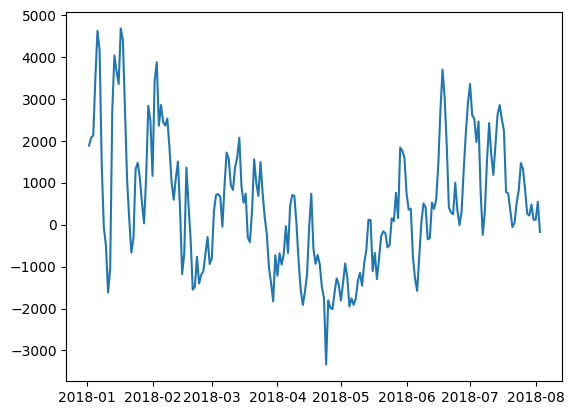

MAE:1296.6022625921764, RMSE: 1598.686864759409


In [33]:
SARIMA_forecasts={}
for date in d_dates:
  train_data = daily[date:train_end]
  model = SARIMAX(train_data, order=(2,0,1),seasonal_order=(2,1,1,7))
  model_fit = model.fit()
  predictions = model_fit.predict(start = train_end+timedelta(days=1), end=test_end)
  residuals = test_data - predictions
  SARIMA_forecasts[date]=predictions
  plt.plot(residuals)
  plt.show()
  print(f'MAE:{mean_absolute_error(test_data,prediction)}, RMSE: {np.sqrt(mean_squared_error(test_data,prediction))}')

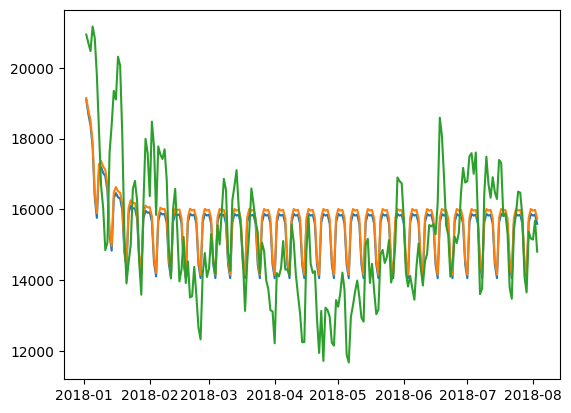

2007-09-10 00:00:00
TtestResult(statistic=94.79812679478897, pvalue=3.74014111712576e-176, df=213)
WilcoxonResult(statistic=9272.0, pvalue=0.013911695958535765)


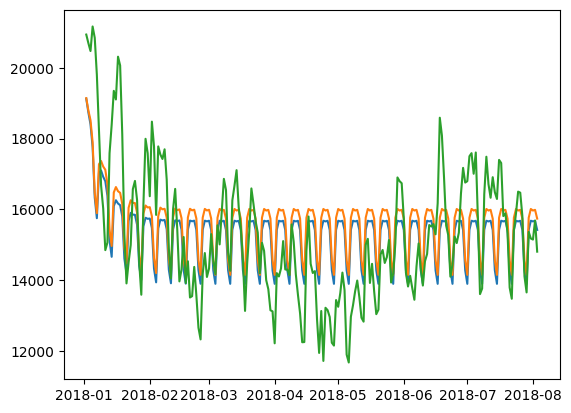

2009-07-22 00:00:00
TtestResult(statistic=96.3010778710867, pvalue=1.4152207872781666e-177, df=213)
WilcoxonResult(statistic=9169.0, pvalue=0.010078863210742335)


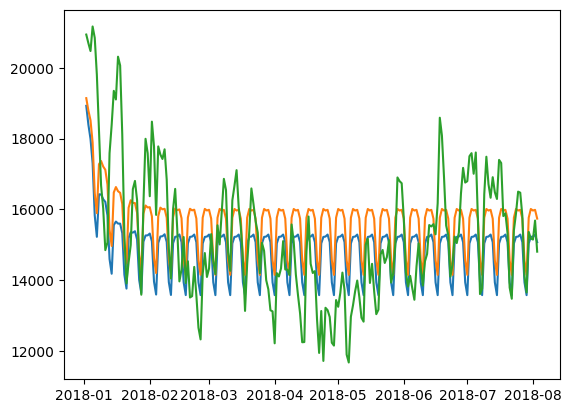

2011-01-29 00:00:00
TtestResult(statistic=110.7524981302554, pvalue=2.9498176575538483e-190, df=213)
WilcoxonResult(statistic=10706.0, pvalue=0.37978778730357443)


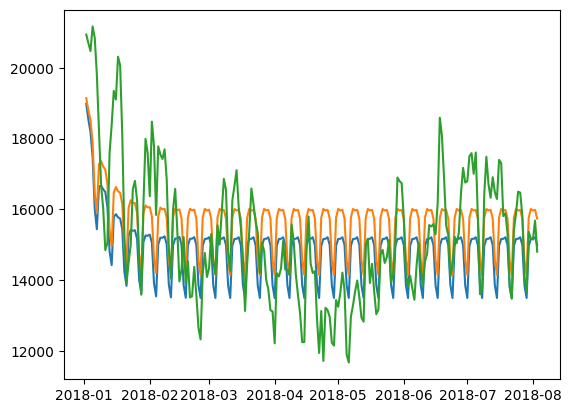

2013-04-09 00:00:00
TtestResult(statistic=115.37827248030739, pvalue=5.57782392846538e-194, df=213)
WilcoxonResult(statistic=10161.0, pvalue=0.13907354968683128)


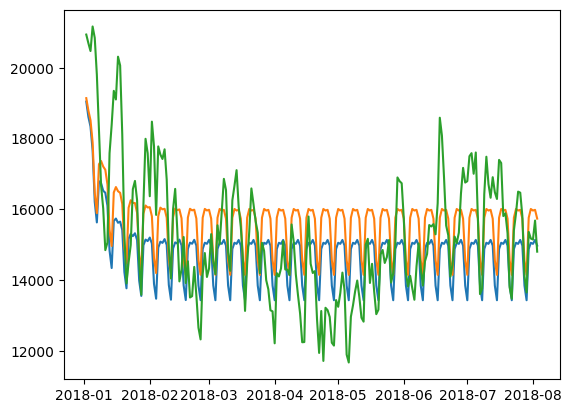

2014-11-06 00:00:00
TtestResult(statistic=81.82922244220913, pvalue=6.584775706563097e-163, df=213)
WilcoxonResult(statistic=10666.0, pvalue=0.3563227282562018)


In [34]:
from scipy import stats
for date in SARIMA_forecasts:
  plt.plot(SARIMA_forecasts[date])
  plt.plot(prediction)
  plt.plot(test_data)
  plt.show()
  print(date)
  print(stats.ttest_rel(prediction, SARIMA_forecasts[date]))
  error1 = test_data - prediction
  error2 = test_data - SARIMA_forecasts[date]
  print(stats.wilcoxon(abs(error1),abs(error2)))

In [35]:
final = SARIMA_forecasts[datetime(2014,11,6)]
for i in range(214):
  if final.iloc[i] != prediction.iloc[i]:
    print(i, final.iloc[i])

print(mean_absolute_error(test_data,prediction), mean_absolute_error(test_data,final))
print (prediction is final)

0 19046.116081077314
1 18613.916454643128
2 18341.402320253612
3 17666.241266329394
4 16217.837297157244
5 15634.602131480473
6 16798.08636397288
7 16740.061823895707
8 16528.944788619017
9 16470.989751030793
10 16106.077628038514
11 14840.547633631657
12 14346.924905043097
13 15675.564195298855
14 15743.648866288228
15 15624.651880378851
16 15657.447374481902
17 15421.881789519173
18 14233.585631639446
19 13774.640571718772
20 15174.335154690176
21 15311.220238826536
22 15247.049951172998
23 15328.404367429885
24 15141.390326395087
25 13990.287053682852
26 13559.32212702072
27 14988.239336474962
28 15150.448088711713
29 15107.331412675103
30 15207.156037161081
31 15037.730199848344
32 13900.60294532997
33 13480.603753285162
34 14920.300140652804
35 15091.967903607361
36 15056.824654354137
37 15163.562698951655
38 15000.366553286307
39 13868.400025548606
40 13452.66296852306
41 14896.245231754117
42 15071.271656819205
43 15038.986002814763
44 15148.192901749948
45 14987.180086540735
46

# LSTM


In [65]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np

In [66]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(daily.values.reshape(-1,1))
scaled_data = pd.DataFrame(scaled_data, columns=['value'])
scaled_data.index = daily.index
print(scaled_data)

               value
Datetime            
2004-10-01  0.272432
2004-10-02  0.163285
2004-10-03  0.097626
2004-10-04  0.274515
2004-10-05  0.285617
...              ...
2018-07-30  0.364495
2018-07-31  0.348539
2018-08-01  0.346065
2018-08-02  0.391647
2018-08-03  0.316993

[5055 rows x 1 columns]


In [67]:
def generate_sequences(data, seq_len=43):
  X = []
  Y = []
  for i in range(len(data) - seq_len):
    sequence = data.iloc[i:i+seq_len].values
    label = data.iloc[i+seq_len].values
    X.append(sequence)
    Y.append(label)
  return np.array(X), np.array(Y)
seq_len = 43

X,Y = generate_sequences(scaled_data)

In [68]:
split = datetime(2018,1,1)
test_end = datetime(2018,8,3)
train_end = daily.index.get_loc(daily[daily.index==split].index[0])

X_train, X_test = X[:train_end-seq_len+1], X[train_end-seq_len+1:]
Y_train, Y_test = Y[:train_end-seq_len+1], Y[train_end-seq_len+1:]
print(X_test.shape, X_train.shape)

(214, 43, 1) (4798, 43, 1)


In [69]:
model = Sequential()
model.add(LSTM(43, return_sequences=True, input_shape=(seq_len, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
early_stop = EarlyStopping(monitor='val_loss', patience=10)
LSTM_model = model.fit(X_train, Y_train, epochs=15, batch_size=32,validation_split=0.2, callbacks=[early_stop])


Epoch 1/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - loss: 0.0423 - val_loss: 0.0138
Epoch 2/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 7s 58ms/step - loss: 0.0141 - val_loss: 0.0130
Epoch 3/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0130 - val_loss: 0.0132
Epoch 4/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - loss: 0.0130 - val_loss: 0.0110
Epoch 5/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0118 - val_loss: 0.0097
Epoch 6/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 9s 43ms/step - loss: 0.0089 - val_loss: 0.0063
Epoch 7/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 10s 40ms/step - loss: 0.0067 - val_loss: 0.0069
Epoch 8/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0067 - val_loss: 0.0058
Epoch 9/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 6s 45ms/step - loss: 0.0067 - val_loss: 0.0057
Epoch 10/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 12s 56ms/step - loss: 0.0065 - val_loss: 0.0058
Epoch 11/15
120/120 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - loss: 0.0064 - val_loss: 0.0055
Epoch 12/15
120/120 ━━━━━━━━━━━━━━━━━━━

dict_keys(['loss', 'val_loss'])


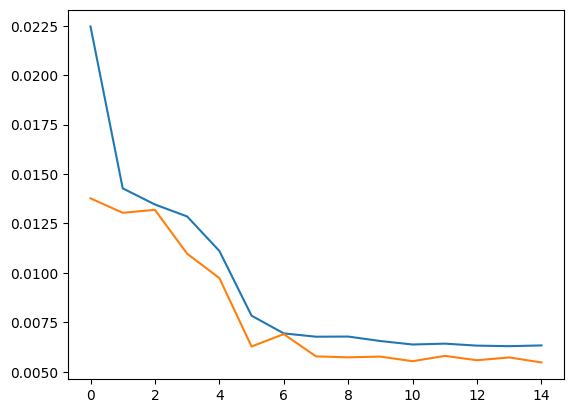

In [71]:
print(LSTM_model.history.keys())
plt.plot(LSTM_model.history['loss'])
plt.plot(LSTM_model.history['val_loss'])
plt.show()
print(LSTM_model.summary())

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step


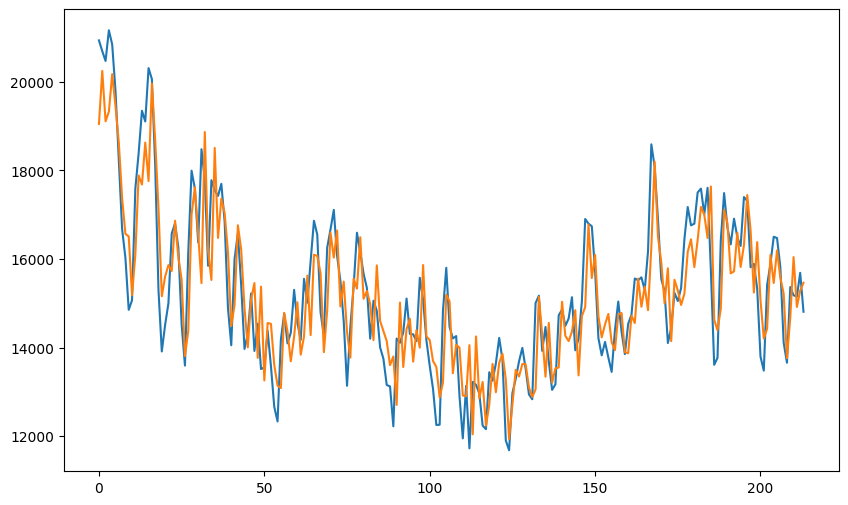

In [72]:
Y_pred = model.predict(X_test)


Y_test_inv = scaler.inverse_transform(Y_test)
Y_pred_inv = scaler.inverse_transform(Y_pred)

plt.figure(figsize=(10,6))
plt.plot(Y_test_inv)
plt.plot(Y_pred_inv)
plt.show()


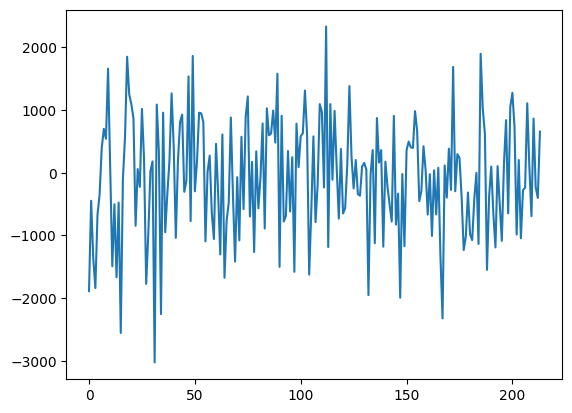

In [73]:
residuals = Y_pred_inv - Y_test_inv
plt.plot(residuals)
plt.show()

In [74]:
print(f'MAE:{mean_absolute_error(Y_test_inv,Y_pred_inv)}, RMSE: {np.sqrt(mean_squared_error(Y_test_inv,Y_pred_inv))}')

MAE:736.6658733005722, RMSE: 922.0290387804262


In [75]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 43, 43)              │           7,740 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          18,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,775 (311.62 KB)

 Trainable params: 26,591 (103.87 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 53,184 (207.75 KB)

Epoch 1/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - loss: 0.0060 - val_loss: 0.0057
Epoch 2/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0059 - val_loss: 0.0058
Epoch 3/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0061 - val_loss: 0.0053
Epoch 4/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - loss: 0.0058 - val_loss: 0.0054
Epoch 5/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 107ms/step - loss: 0.0055 - val_loss: 0.0051
Epoch 6/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 8s 85ms/step - loss: 0.0055 - val_loss: 0.0046
Epoch 7/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 11s 89ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 8/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 39ms/step - loss: 0.0050 - val_loss: 0.0045
Epoch 9/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 39ms/step - loss: 0.0048 - val_loss: 0.0050
Epoch 10/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 11/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 9s 41ms/step - loss: 0.0044 - val_loss: 0.0046
Epoch 12/15
94/94 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 

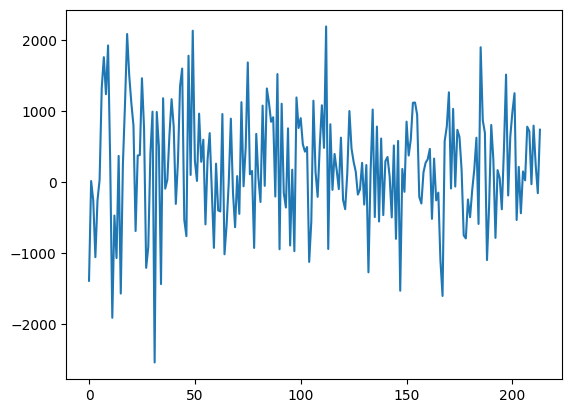

2007-09-10 00:00:00
MAE:664.0269565243847, RMSE: 832.7632233634519
Epoch 1/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0042 - val_loss: 0.0043
Epoch 2/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 3/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 4/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 5/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 40ms/step - loss: 0.0041 - val_loss: 0.0042
Epoch 6/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 51ms/step - loss: 0.0042 - val_loss: 0.0045
Epoch 7/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0053 - val_loss: 0.0040
Epoch 8/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 9/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0042 - val_loss: 0.0038
Epoch 10/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - loss: 0.0040 - val_loss: 0.0038
Epoch 11/15
77/77 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - loss: 0.0044 - val_loss: 0.0

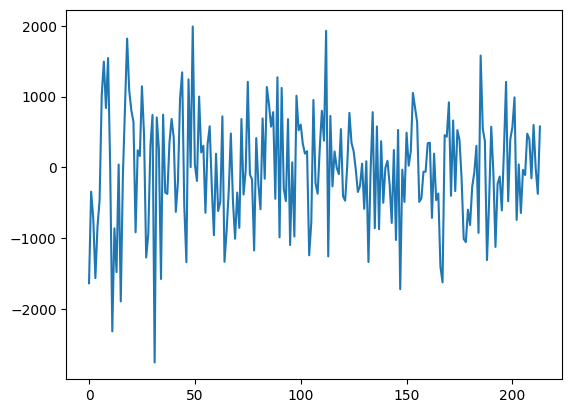

2009-07-22 00:00:00
MAE:631.618403540545, RMSE: 793.6919226538943
Epoch 1/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0043 - val_loss: 0.0041
Epoch 2/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 3/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - loss: 0.0041 - val_loss: 0.0041
Epoch 4/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 5/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 6/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 45ms/step - loss: 0.0043 - val_loss: 0.0039
Epoch 7/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 67ms/step - loss: 0.0040 - val_loss: 0.0040
Epoch 8/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0046 - val_loss: 0.0039
Epoch 9/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 10/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 11/15
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 68ms/step - loss: 0.0046 - val_loss: 0.00

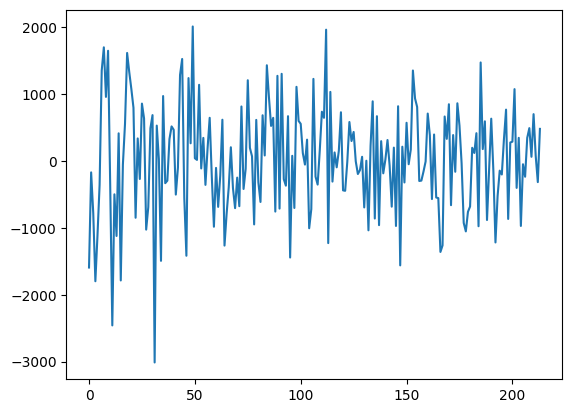

2011-01-29 00:00:00
MAE:631.6224877622155, RMSE: 802.5390585937993
Epoch 1/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 2/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0043 - val_loss: 0.0036
Epoch 3/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0040 - val_loss: 0.0036
Epoch 4/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0043 - val_loss: 0.0037
Epoch 5/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - loss: 0.0045 - val_loss: 0.0040
Epoch 6/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0045 - val_loss: 0.0036
Epoch 7/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 48ms/step - loss: 0.0042 - val_loss: 0.0036
Epoch 8/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 9/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0044 - val_loss: 0.0038
Epoch 10/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 41ms/step - loss: 0.0047 - val_loss: 0.0037
Epoch 11/15
43/43 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - loss: 0.0043 - val_loss: 0.0

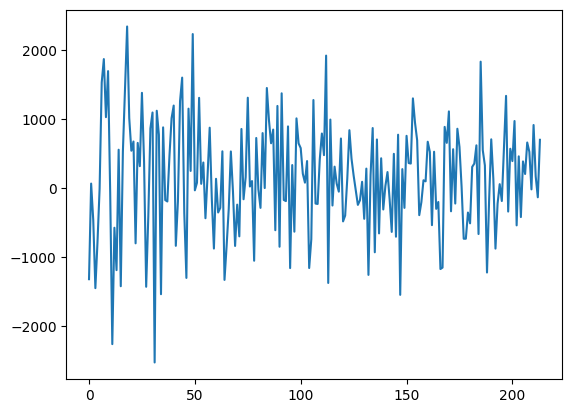

2013-04-09 00:00:00
MAE:654.670141578415, RMSE: 822.1533521261057
Epoch 1/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0040 - val_loss: 0.0035
Epoch 2/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0039 - val_loss: 0.0033
Epoch 3/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0045 - val_loss: 0.0029
Epoch 4/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 0.0039 - val_loss: 0.0030
Epoch 5/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 69ms/step - loss: 0.0039 - val_loss: 0.0032
Epoch 6/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0041 - val_loss: 0.0034
Epoch 7/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0037 - val_loss: 0.0030
Epoch 8/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0035 - val_loss: 0.0030
Epoch 9/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0041 - val_loss: 0.0031
Epoch 10/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - loss: 0.0037 - val_loss: 0.0029
Epoch 11/15
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step - loss: 0.0037 - val_loss: 0.00

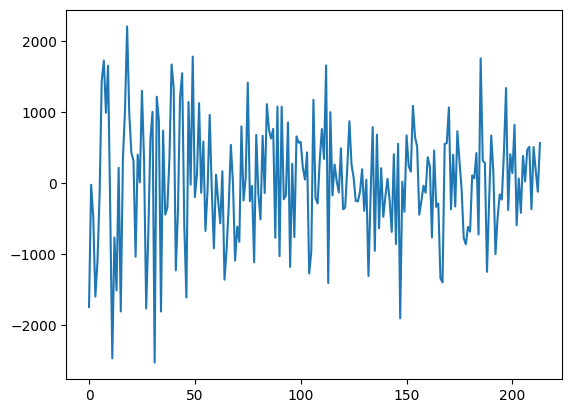

2014-11-06 00:00:00
MAE:650.3227104549726, RMSE: 829.5906481325019


In [76]:
LSTM_forecasts={}
for date in d_dates:
  train_start = daily.index.get_loc(daily[daily.index==date].index[0])
  X_train, X_test = X[train_start:train_end-seq_len+1], X[train_end-seq_len+1:]
  Y_train, Y_test = Y[train_start:train_end-seq_len+1], Y[train_end-seq_len+1:]
  early_stop = EarlyStopping(monitor='val_loss', patience=10)
  LSTM_model_fit = model.fit(X_train, Y_train, epochs=15, batch_size=32,validation_split=0.2, callbacks=[early_stop])
  Y_preds = model.predict(X_test)
  Y_test_inv = scaler.inverse_transform(Y_test)
  Y_preds_inv = scaler.inverse_transform(Y_preds)
  residuals = Y_preds_inv - Y_test_inv
  plt.plot(residuals)
  plt.show()
  LSTM_forecasts[date]=Y_preds_inv
  print(date)
  print(f'MAE:{mean_absolute_error(Y_test_inv,Y_preds_inv)}, RMSE: {np.sqrt(mean_squared_error(Y_test_inv,Y_preds_inv))}')

2007-09-10 00:00:00
WilcoxonResult(statistic=array([3286.]), pvalue=array([1.3021325e-19]))
TtestResult(statistic=array([-11.20114312]), pvalue=array([3.37675427e-23]), df=array([213]))
MAE:664.0269565243847, RMSE: 832.7632233634519


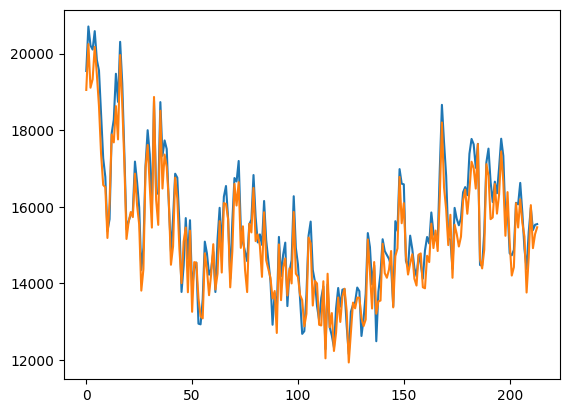

(214, 1)
(214, 1)
2009-07-22 00:00:00
WilcoxonResult(statistic=array([9284.]), pvalue=array([0.01443296]))
TtestResult(statistic=array([-1.92715827]), pvalue=array([0.05529023]), df=array([213]))
MAE:631.618403540545, RMSE: 793.6919226538943


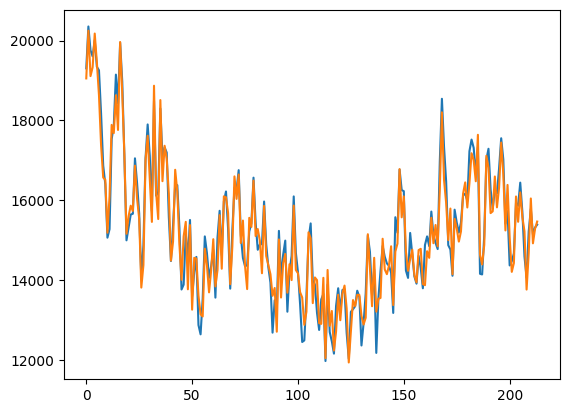

(214, 1)
(214, 1)
2011-01-29 00:00:00
WilcoxonResult(statistic=array([8542.]), pvalue=array([0.0010966]))
TtestResult(statistic=array([-2.85917087]), pvalue=array([0.00466964]), df=array([213]))
MAE:631.6224877622155, RMSE: 802.5390585937993


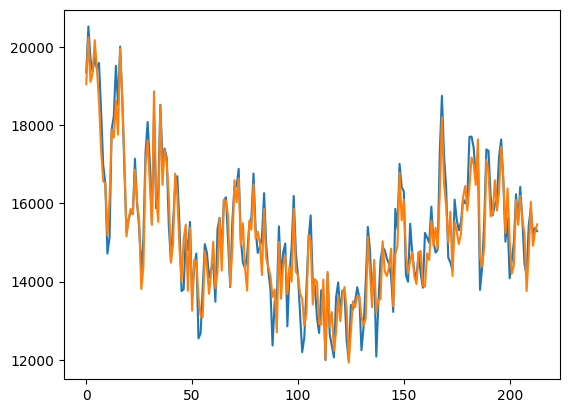

(214, 1)
(214, 1)
2013-04-09 00:00:00
WilcoxonResult(statistic=array([5641.]), pvalue=array([1.02390368e-10]))
TtestResult(statistic=array([-6.73140418]), pvalue=array([1.53194347e-10]), df=array([213]))
MAE:654.670141578415, RMSE: 822.1533521261057


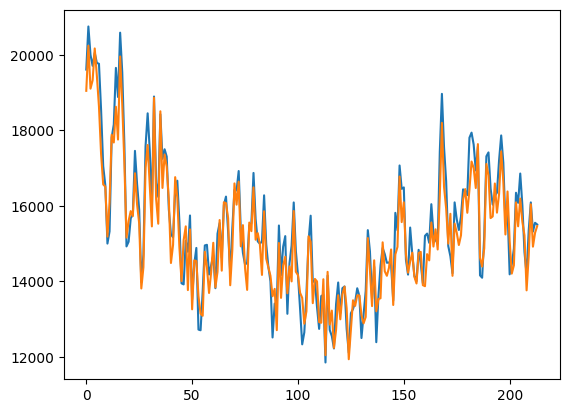

(214, 1)
(214, 1)
2014-11-06 00:00:00
WilcoxonResult(statistic=array([8482.]), pvalue=array([0.00086642]))
TtestResult(statistic=array([-2.82335482]), pvalue=array([0.00520298]), df=array([213]))
MAE:650.3227104549726, RMSE: 829.5906481325019


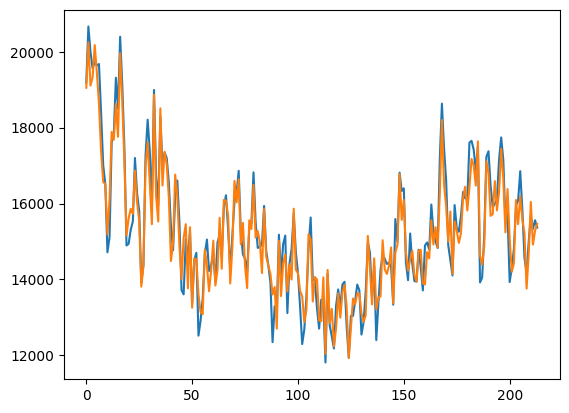

(214, 1)
(214, 1)
MAE:736.6658733005722, RMSE: 922.0290387804262


In [83]:
for date in LSTM_forecasts:
  print(date)
  error1 = Y_test_inv - Y_pred_inv
  error2 = Y_test_inv - LSTM_forecasts[date]
  print(stats.wilcoxon(error1,error2))
  print(stats.ttest_rel(Y_pred_inv, LSTM_forecasts[date]))
  print(f'MAE:{mean_absolute_error(Y_test_inv,LSTM_forecasts[date])}, RMSE: {np.sqrt(mean_squared_error(Y_test_inv,LSTM_forecasts[date]))}')
 # print(stats.ttest_rel(Y_pred_inv, LSTM_forecasts[date]))
 # print(stats.wilcoxon(Y_pred_inv, LSTM_forecasts[date]))
  plt.plot(LSTM_forecasts[date])
  plt.plot(Y_pred_inv)
  plt.show()
  print(LSTM_forecasts[date].shape)
  print(Y_pred_inv.shape)
print(f'MAE:{mean_absolute_error(Y_test_inv,Y_pred_inv)}, RMSE: {np.sqrt(mean_squared_error(Y_test_inv,Y_pred_inv))}')

In [78]:
for date in LSTM_forecasts:
  print(date)
  error1 = Y_test_inv - Y_pred_inv
  error2 = Y_test_inv - LSTM_forecasts[date]
  print(stats.wilcoxon(error1,error2))

2007-09-10 00:00:00
WilcoxonResult(statistic=array([3286.]), pvalue=array([1.3021325e-19]))
2009-07-22 00:00:00
WilcoxonResult(statistic=array([9284.]), pvalue=array([0.01443296]))
2011-01-29 00:00:00
WilcoxonResult(statistic=array([8542.]), pvalue=array([0.0010966]))
2013-04-09 00:00:00
WilcoxonResult(statistic=array([5641.]), pvalue=array([1.02390368e-10]))
2014-11-06 00:00:00
WilcoxonResult(statistic=array([8482.]), pvalue=array([0.00086642]))


# Holt-winters exponential smoothing

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


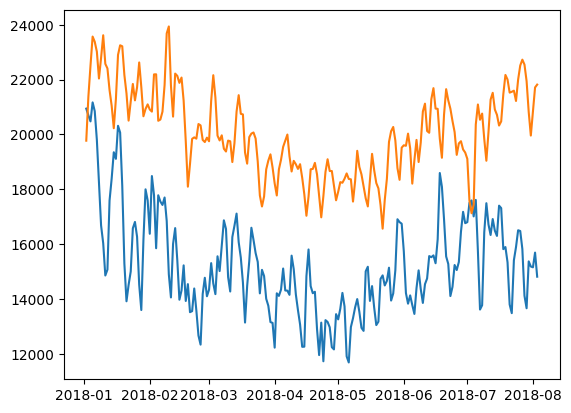

                       ExponentialSmoothing Model Results                       
Dep. Variable:                   AEP_MW   No. Observations:                 1153
Model:             ExponentialSmoothing   SSE                     1141864727.737
Optimized:                         True   AIC                          16656.094
Trend:                         Additive   BIC                          18519.589
Seasonal:                      Additive   AICC                         17009.518
Seasonal Periods:                   365   Date:                 Sat, 24 Aug 2024
Box-Cox:                          False   Time:                         23:00:08
Box-Cox Coeff.:                    None                                         
                           coeff                 code              optimized      
----------------------------------------------------------------------------------
smoothing_level                0.9950000                alpha                 True
smoothing_trend       

In [37]:
ESmoothing = ExponentialSmoothing(train_data, seasonal_periods=365, trend='add', seasonal='add').fit()
ESprediction = ESmoothing.forecast(len(test_data))

plt.plot(test_data)
plt.plot(ESprediction)
plt.show()
print(ESmoothing.summary())

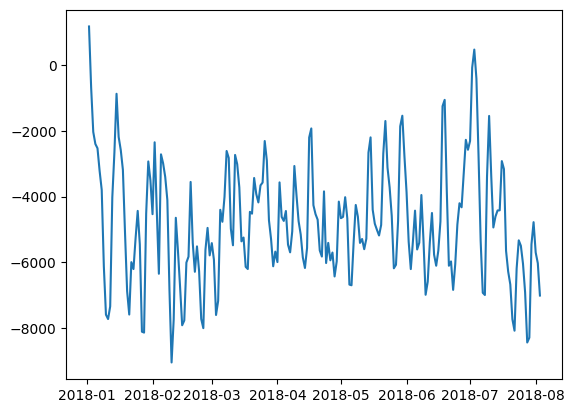

In [38]:
ESresiduals = test_data - ESprediction
plt.plot(ESresiduals)
plt.show()

MAE1067.1637063235069


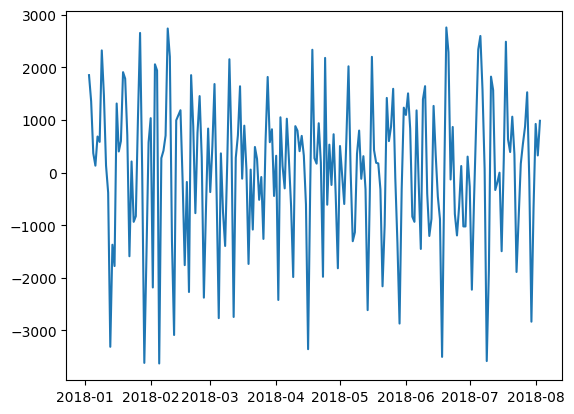

In [51]:
pred_diff = ESprediction.diff()
test_diff = test_data.diff()
#print(pred_diff)
#print(test_diff)
print(f'MAE{mean_absolute_error(pred_diff[1:],test_diff[1:])}')
plt.plot(pred_diff[1:]-test_diff[1:])
plt.show()

In [39]:
print(f'MAE:{mean_absolute_error(test_data,ESprediction)}, RMSE: {np.sqrt(mean_squared_error(test_data,ESprediction))}')

MAE:4805.41837611238, RMSE: 5113.850803374653


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


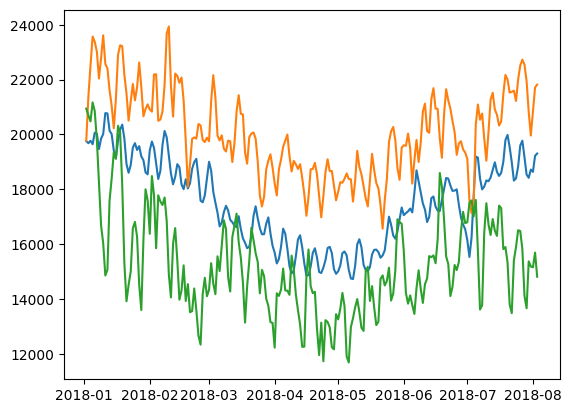

2007-09-10 00:00:00
MAE:2381.861074138278, RMSE: 2779.23284726495


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


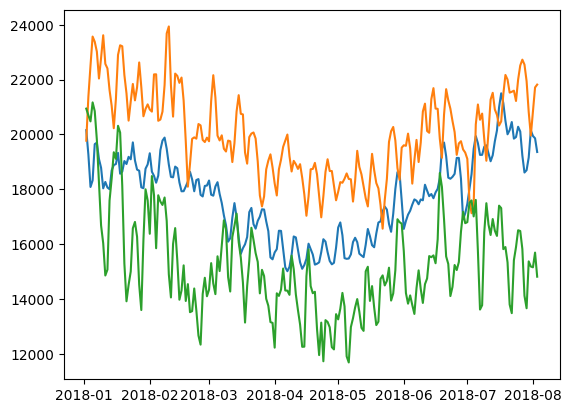

2009-07-22 00:00:00
MAE:2588.2484346639867, RMSE: 2943.8401886718902


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


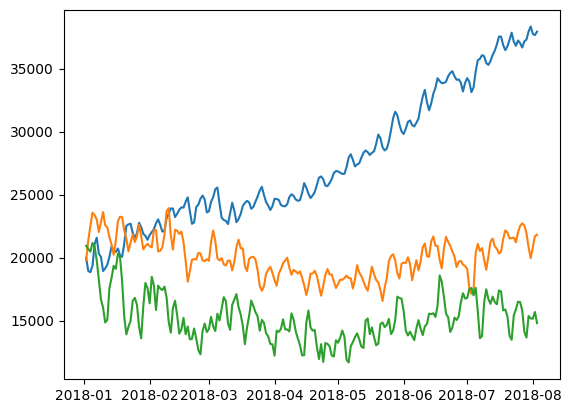

2011-01-29 00:00:00
MAE:12328.359618535622, RMSE: 13608.2780462535


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


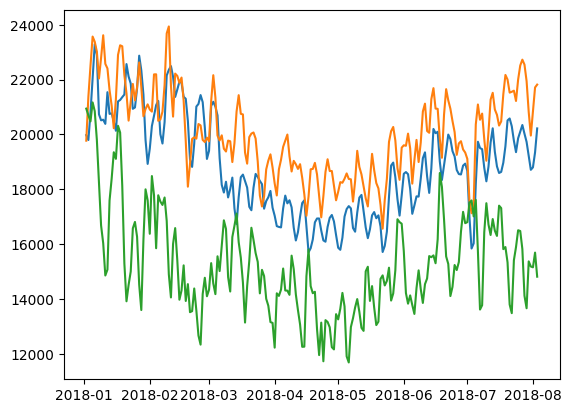

2013-04-09 00:00:00
MAE:3639.9513108356405, RMSE: 4122.247978292511


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


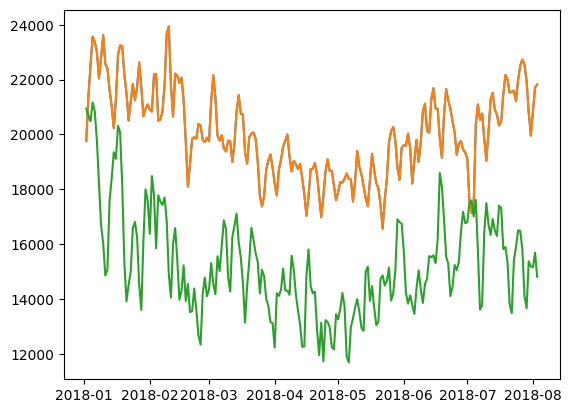

2014-11-06 00:00:00
MAE:4805.41837611238, RMSE: 5113.850803374653


In [41]:
ES_forecasts={}
for i in d_dates:
  train_datas = daily[i:datetime(2018,1,1)]
  test_data = daily[datetime(2018,1,2):test_end]
  ESmoothings = ExponentialSmoothing(train_datas, seasonal_periods=365, trend='add', seasonal='add').fit()
  ESpredictions = ESmoothings.forecast(len(test_data))
  ES_forecasts[i]=ESpredictions
  plt.plot(ESpredictions)
  plt.plot(ESprediction)
  plt.plot(test_data)
  plt.show()
  print(i)
  print(f'MAE:{mean_absolute_error(test_data,ESpredictions)}, RMSE: {np.sqrt(mean_squared_error(test_data,ESpredictions))}')

2018-01-02   -1168.912914
2018-01-03     680.938170
2018-01-04    2034.515146
2018-01-05    2400.955395
2018-01-06    2531.124139
                 ...     
2018-07-30    5450.816621
2018-07-31    4776.589653
2018-08-01    5699.306523
2018-08-02    6023.753979
2018-08-03    7006.096807
Freq: D, Length: 214, dtype: float64


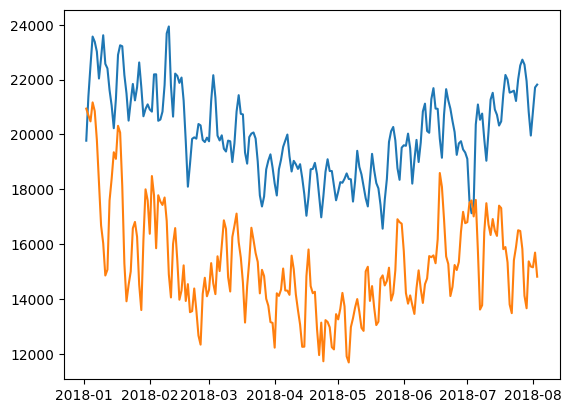

2007-09-10 00:00:00
MAE:2381.861074138278, RMSE: 2779.23284726495
TtestResult(statistic=41.47972568017289, pvalue=5.463733613798084e-104, df=213)
WilcoxonResult(statistic=3.0, pvalue=7.603213791463038e-37)
2009-07-22 00:00:00
MAE:2588.2484346639867, RMSE: 2943.8401886718902
TtestResult(statistic=25.444279153790163, pvalue=1.677129713338214e-66, df=213)
WilcoxonResult(statistic=266.0, pvalue=2.9492829165648564e-35)
2011-01-29 00:00:00
MAE:12328.359618535622, RMSE: 13608.2780462535
TtestResult(statistic=-19.167409118070942, pvalue=2.962536914703321e-48, df=213)
WilcoxonResult(statistic=695.0, pvalue=9.623109242579201e-33)
2013-04-09 00:00:00
MAE:3639.9513108356405, RMSE: 4122.247978292511
TtestResult(statistic=17.627658336358618, pvalue=1.7231717573464229e-43, df=213)
WilcoxonResult(statistic=1359.0, pvalue=4.8252659281979856e-29)
2014-11-06 00:00:00
MAE:4805.41837611238, RMSE: 5113.850803374653
TtestResult(statistic=nan, pvalue=nan, df=213)


ValueError: zero_method 'wilcox' and 'pratt' do not work if x - y is zero for all elements.

In [42]:
print (ES_forecasts[datetime(2014,11,6)]-test_data)
plt.plot(ES_forecasts[datetime(2014,11,6)])
plt.plot(test_data)
plt.show()

for i in ES_forecasts:
  print(i)
  print(f'MAE:{mean_absolute_error(test_data,ES_forecasts[i])}, RMSE: {np.sqrt(mean_squared_error(test_data,ES_forecasts[i]))}')
  print(stats.ttest_rel(ESprediction, ES_forecasts[i]))
  print(stats.wilcoxon(ESprediction, ES_forecasts[i]))

print(f'MAE:{mean_absolute_error(test_data,ES_forecasts[datetime(2014,11,6)])}, RMSE: {np.sqrt(mean_squared_error(test_data,ES_forecasts[datetime(2014,11,6)]))}')
print(stats.ttest_rel(ESprediction, ES_forecasts[datetime(2014,11,6)]))
print(stats.wilcoxon(ESprediction, ES_forecasts[datetime(2014,11,6)]))